<a href="https://colab.research.google.com/github/pushkarSPIT/DA1/blob/main/DA_EXP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DA/2015.csv')

In [4]:
df16 = pd.read_csv('/content/drive/MyDrive/DA/2016.csv')
df17 = pd.read_csv('/content/drive/MyDrive/DA/2017.csv')
df18 = pd.read_csv('/content/drive/MyDrive/DA/2018.csv')
df19 = pd.read_csv('/content/drive/MyDrive/DA/2019.csv')

# Cleaning the Data

In [5]:
df.head()

,Country,Year,Rank,Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Corruption,Generosity,Dystopia_Residual,St_Error,Region,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.03411,Western Europe,NaN,NaN
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.04884,Western Europe,NaN,NaN
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.03328,Western Europe,NaN,NaN
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.03880,Western Europe,NaN,NaN
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.03553,North America,NaN,NaN


In [6]:
df.shape

(158, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    158 non-null    object 
 1   Year                       158 non-null    int64  
 2   Rank                       158 non-null    int64  
 3   Score                      158 non-null    float64
 4   GDP_Capita                 158 non-null    float64
 5   Family                     158 non-null    float64
 6   Life_Expectancy            158 non-null    float64
 7   Freedom                    158 non-null    float64
 8   Gov_Corruption             158 non-null    float64
 9   Generosity                 158 non-null    float64
 10  Dystopia_Residual          158 non-null    float64
 11  St_Error                   158 non-null    float64
 12  Region                     158 non-null    object 
 13  Lower Confidence Interval  0 non-null      float64

In [8]:
df.columns

Index(['Country', 'Year', 'Rank', 'Score', 'GDP_Capita', 'Family',
       'Life_Expectancy', 'Freedom', 'Gov_Corruption', 'Generosity',
       'Dystopia_Residual', 'St_Error', 'Region', 'Lower Confidence Interval',
       'Upper Confidence Interval'],
      dtype='object')

In [9]:
#deleting unnecessary columns
df.drop(['Dystopia_Residual','St_Error','Lower Confidence Interval','Upper Confidence Interval','Year'],axis=1,inplace = True)

In [10]:
df.isnull().sum()

Country            0
Rank               0
Score              0
GDP_Capita         0
Family             0
Life_Expectancy    0
Freedom            0
Gov_Corruption     0
Generosity         0
Region             0
dtype: int64

# EDA and Visualisation

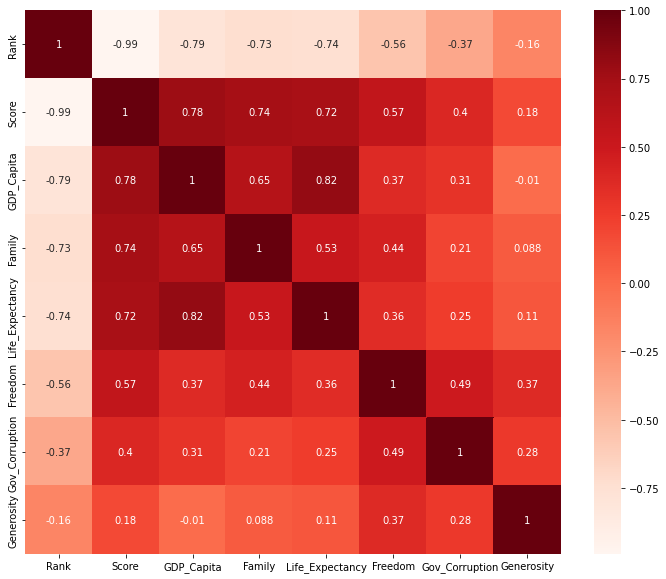

In [11]:
plt.figure(figsize=(12,10))
corrmat = df.corr()
sns.heatmap(corrmat,annot = True, cmap=plt.cm.Reds )
plt.show()

We can see that the score is highly correlated with GDP/capita and Family. Generosity has very little effect on the score. We can also observe that GDP and Life expectency have a high correlation

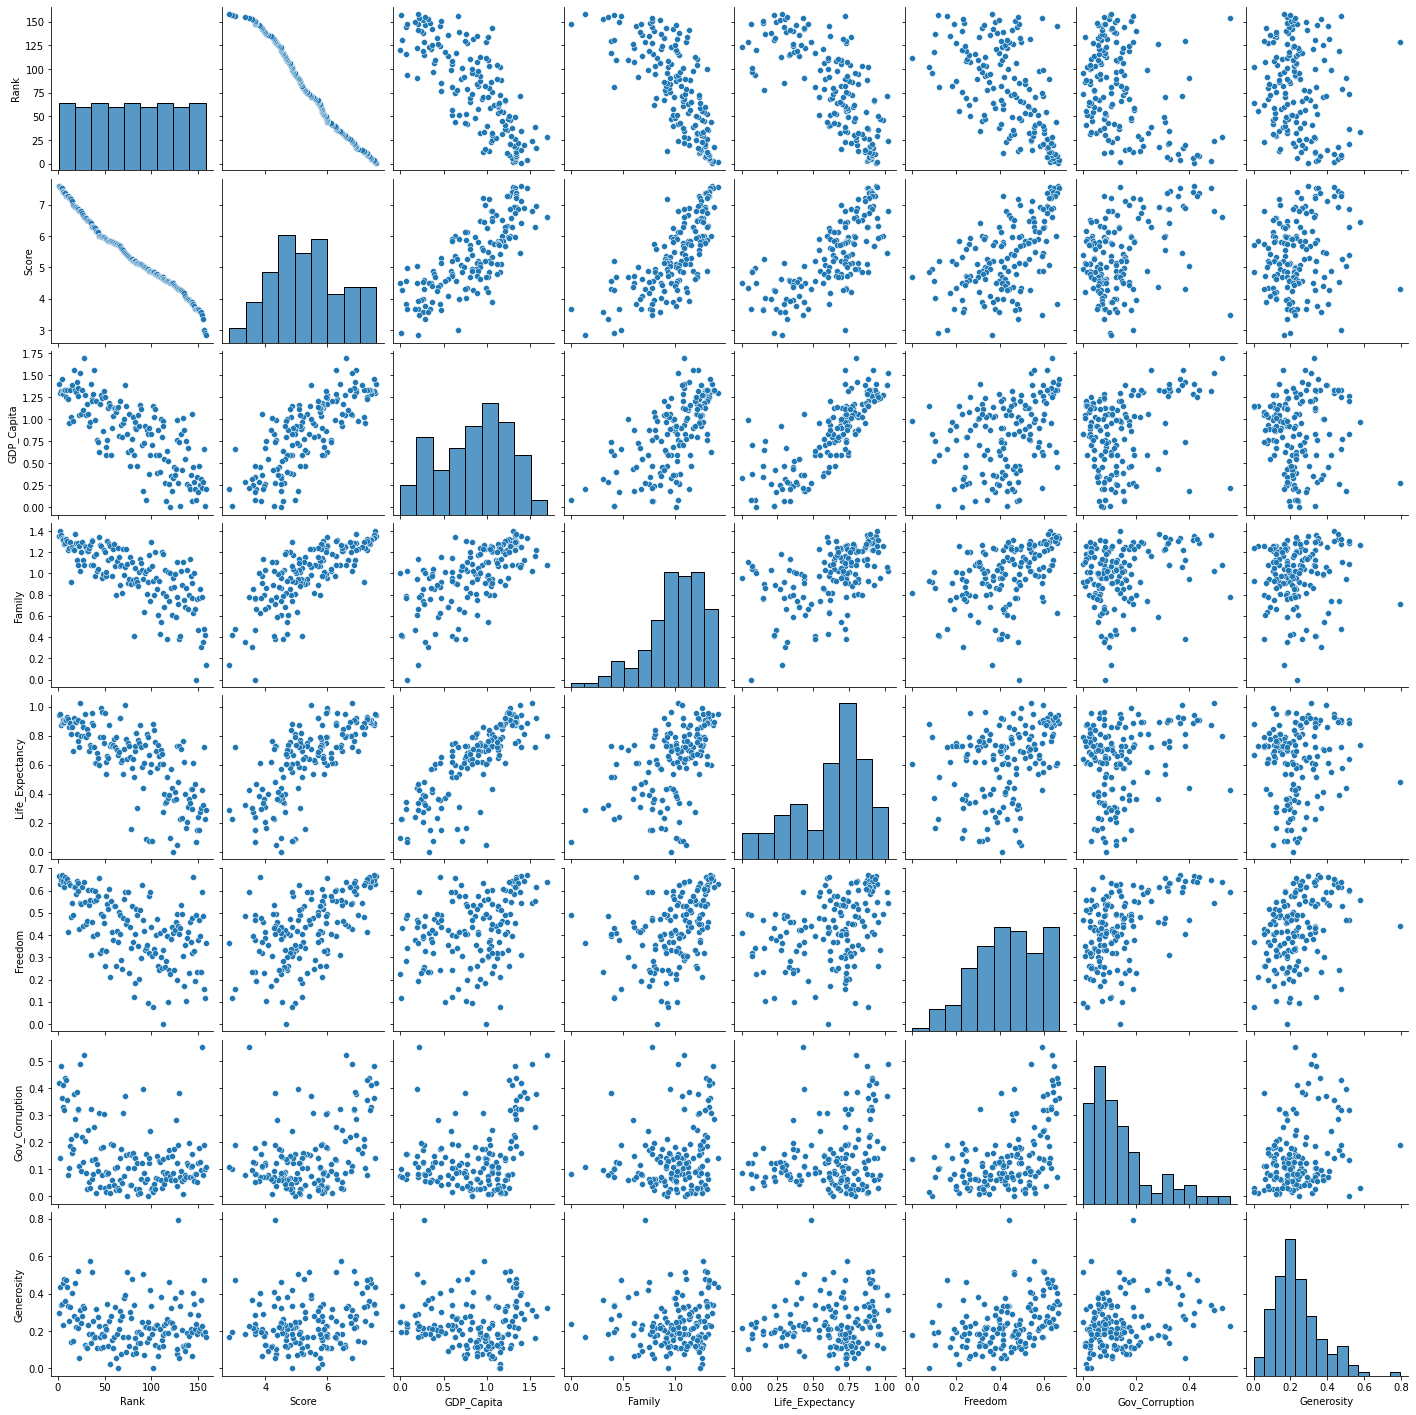

In [12]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


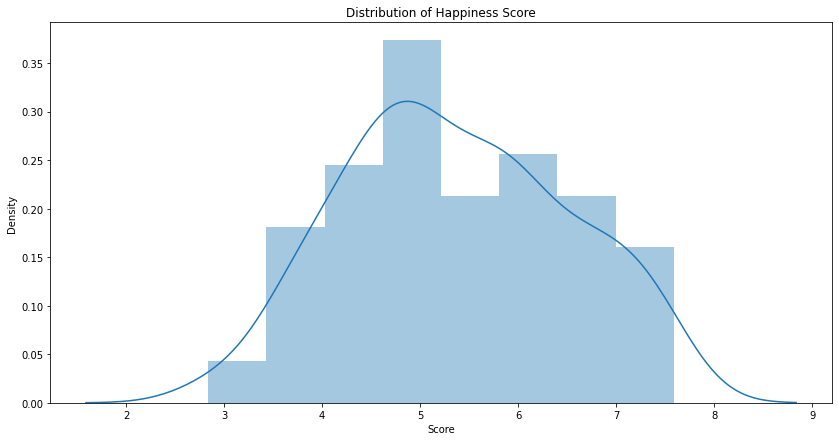

In [13]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Happiness Score")
sns.distplot(a=df['Score']);

We can observe that happiness score lies between 2-8. Majority of countries have happiness score around 5

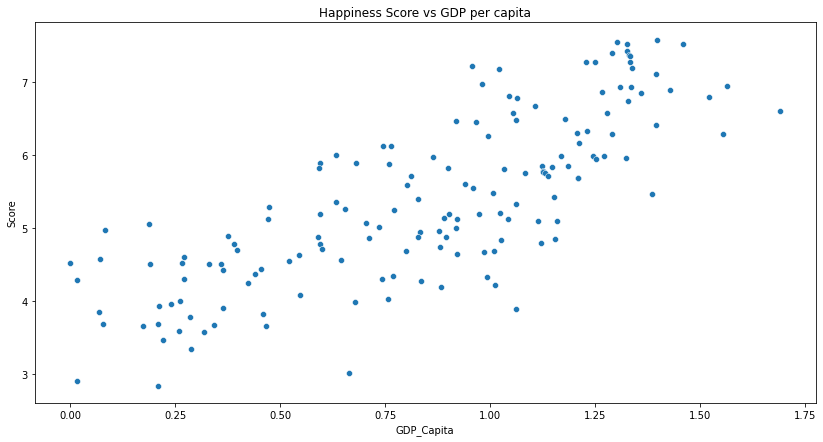

In [14]:
plt.figure(figsize=(14,7))
plt.title("Happiness Score vs GDP per capita")
sns.scatterplot(data=df, x='GDP_Capita', y='Score');

We can clearly observe a linear relationship between score and GDP. As GDP of a country increases, the score increases

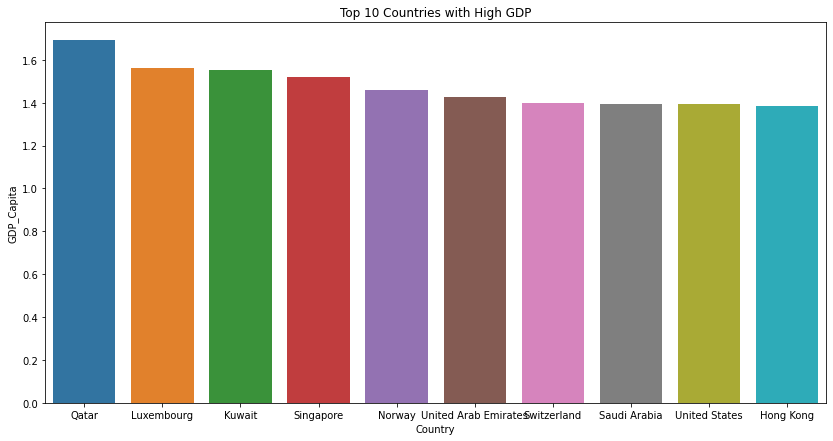

In [15]:
plt.figure(figsize=(14,7))
plt.title("Top 10 Countries with High GDP")
sns.barplot(data = df.sort_values('GDP_Capita', ascending= False).head(10), y='GDP_Capita', x='Country')

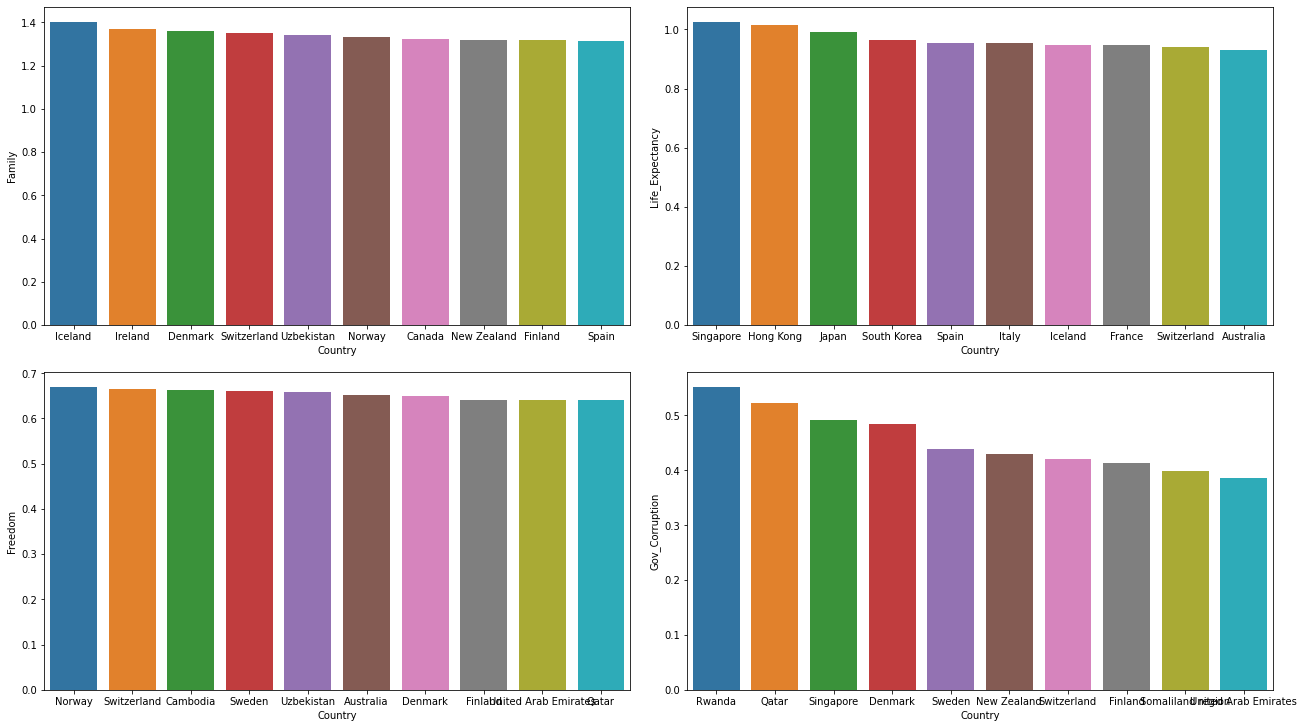

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(18,10))
sns.barplot(data = df.sort_values('Family', ascending= False).head(10),ax=axes[0,0], y='Family', x='Country')
sns.barplot(data = df.sort_values('Life_Expectancy', ascending= False).head(10),ax=axes[0,1], y='Life_Expectancy', x='Country')
sns.barplot(data = df.sort_values('Freedom', ascending= False).head(10),ax=axes[1,0], y='Freedom', x='Country')
sns.barplot(data = df.sort_values('Gov_Corruption', ascending= False).head(10),ax=axes[1,1], y='Gov_Corruption', x='Country')

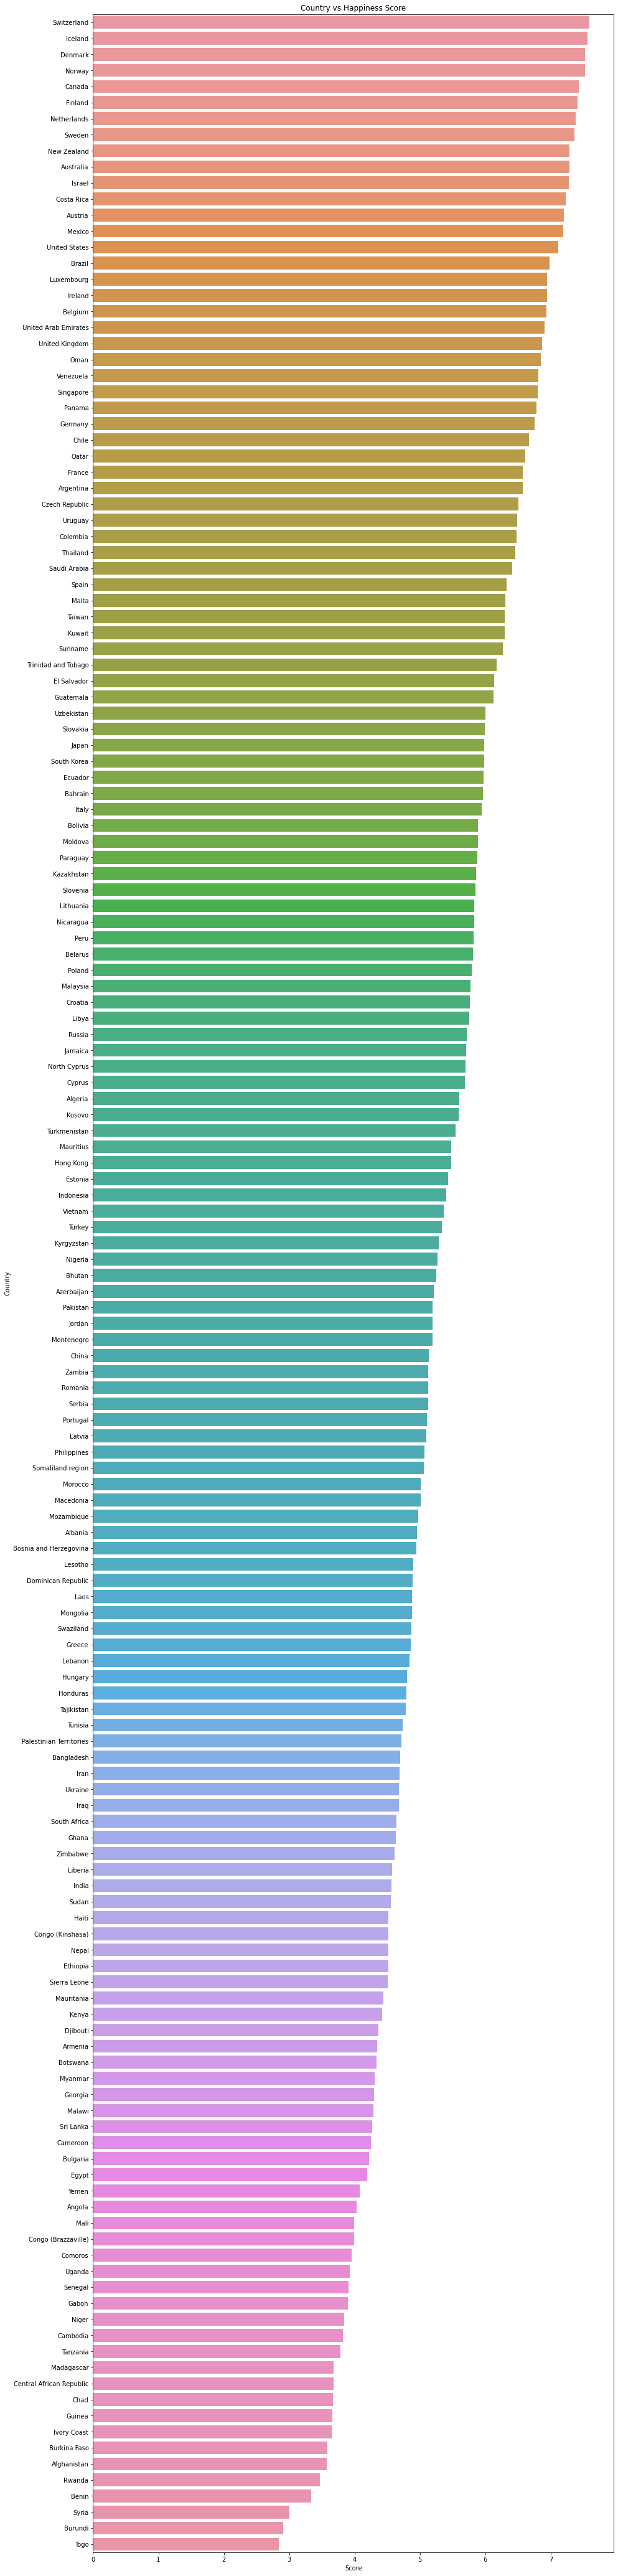

In [17]:
plt.figure(figsize=(15,75))
plt.title('Country vs Happiness Score')
sns.barplot(data=df.sort_values('Score', ascending=False), x='Score', y='Country');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fdc654c90>,
      dtype=object)

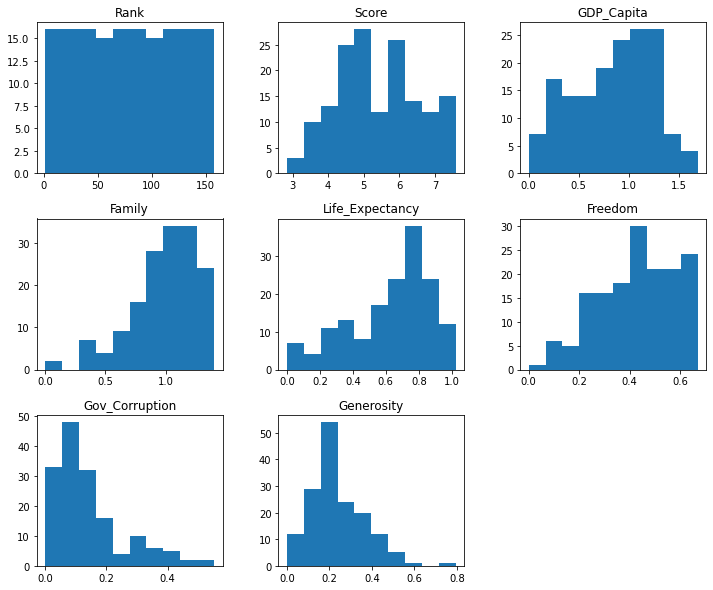

In [18]:
df.hist(bins=10,figsize=(12,10),grid=False)

There are no countries with happiness score greater than 8 and less than 2. Majority of the countries have freedom to make life choices.Most countries have average GDP/capita. Corruption is surprisingly not that great in most countries

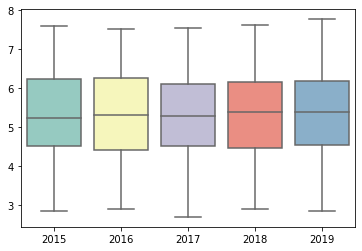

In [19]:
scores=pd.DataFrame(data={'2015':df['Score'],'2016':df16['Score'],'2017':df17['Score'],'2018':df18['Score'],'2019':df19['Score']})
sns.boxplot(data=scores,palette='Set3');

There are no substantial changes over the years

In [20]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

#EDA on India

In [22]:
df.loc[df['Country']=='India']

,Country,Rank,Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Corruption,Generosity,Region
116,India,117,4.565,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,Southern Asia


In [25]:
d = df[(df['Country'].isin(['India','Canada','United Kingdom', 'United States','Australia']))]
d

,Country,Rank,Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Corruption,Generosity,Region
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,Australia and New Zealand
14,United States,15,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,North America
20,United Kingdom,21,6.867,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,Western Europe
116,India,117,4.565,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,Southern Asia


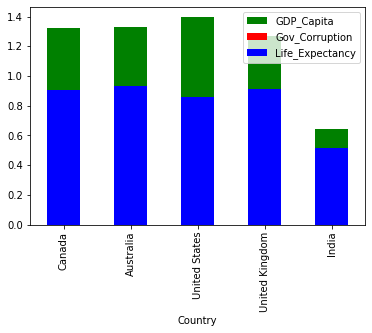

In [32]:
ax = d.plot(y="GDP_Capita", x="Country", kind="bar",color='green')
d.plot(y="Gov_Corruption", x="Country", kind="bar", ax=ax, color="red")
d.plot(y="Life_Expectancy", x="Country", kind="bar", ax=ax, color="blue")

plt.show()

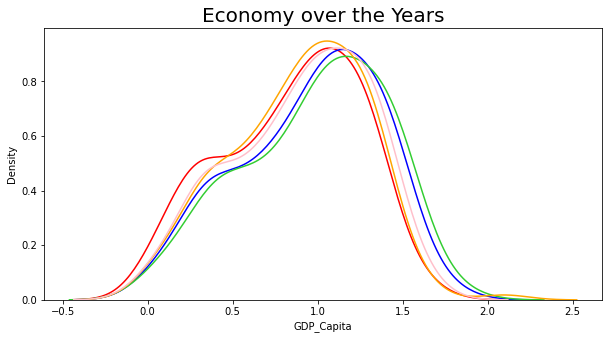

In [33]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['GDP_Capita'],color='red')
sns.kdeplot(df16['GDP_Capita'],color='blue')
sns.kdeplot(df17['GDP_Capita'],color='limegreen')
sns.kdeplot(df18['GDP_Capita'],color='orange')
sns.kdeplot(df19['GDP_Capita'],color='pink')
plt.title('Economy over the Years',size=20)
plt.show()

In [36]:
d_india = pd.concat([df.loc[df['Country']=='India'],df16.loc[df16['Country']=='India'],df17.loc[df17['Country']=='India'],df18.loc[df18['Country']=='India'],df19.loc[df19['Country']=='India']], axis = 0)

In [42]:
d_india.at[116,'Year'] = 2015
d_india.head()

,Country,Rank,Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Corruption,Generosity,Region,Year,Dystopia_Residual,St_Error,Lower Confidence Interval,Upper Confidence Interval
116,India,117.0,4.565,0.644990,0.381740,0.515290,0.397860,0.084920,0.264750,Southern Asia,2015.0,NaN,NaN,NaN,NaN
117,India,118.0,4.404,0.740360,0.292470,0.450910,0.402850,0.087220,0.250280,Southern Asia,2016.0,2.180320,NaN,4.351000,4.457000
121,India,122.0,4.315,0.792221,0.754373,0.455428,0.469987,0.092227,0.231538,NaN,2017.0,1.519117,NaN,4.258478,4.371522
132,India,133.0,4.190,0.721000,0.747000,0.485000,0.539000,0.093000,0.172000,NaN,2018.0,NaN,NaN,NaN,NaN
139,India,140.0,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,NaN,2019.0,NaN,NaN,NaN,NaN


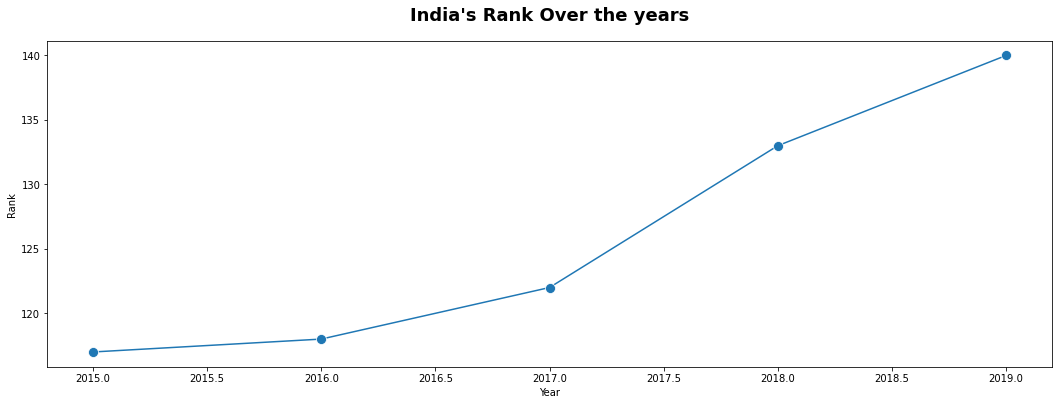

In [46]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Rank', data=d_india, marker='o', markersize=10);
plt.title("India's Rank Over the years", fontsize=18, fontweight='bold', pad=20)
plt.show()

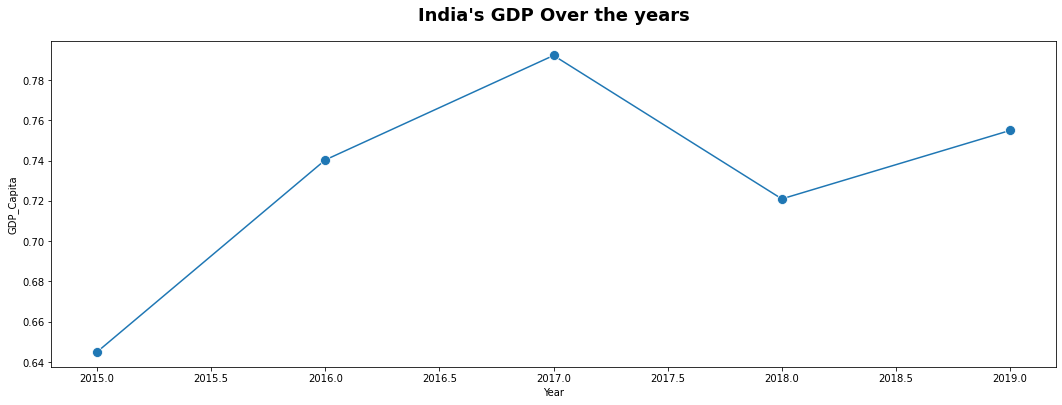

In [47]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='GDP_Capita', data=d_india, marker='o', markersize=10);
plt.title("India's GDP Over the years", fontsize=18, fontweight='bold', pad=20)
plt.show()